## Market Segmentation Example

- Satisfaction: self-reported and people were asked to rate their shopping experience 1-10, type:discrete
- Brand Loyalty: measured through the number of purchases for 1year, type:continuous

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Sets styles for seaborn 
sns.set()
# Use model for k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv('datasets/market-segmentation.csv')

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the Data

Text(0, 0.5, 'Loyalty')

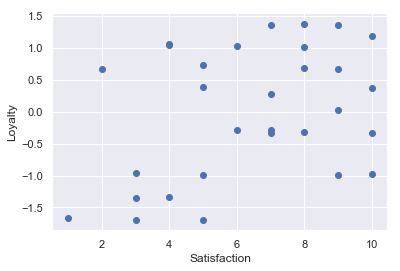

In [5]:
# Let's create a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Label Axis
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [6]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Clustering 

In [7]:
# Create an object called kmeans
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [8]:
# Create a copy of the input data 
clusters = x.copy()
# Take note of the predicted clusters
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

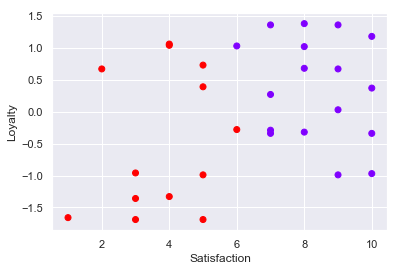

In [9]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Analysis: The algorithm ONLY considered satisfaction as a feature because of the way the graph is split at 6.
- Whenever we cluster on the basis of a single feature, the result looks like this graph 
- How can we fix this problem? By standardizing satisfaction.
- Loyalty was already standardized bc it had a standard deviation of 1 and a mean of 0

## Standardize the Variables

In [16]:
# Import a library where we can do that easily
from sklearn import preprocessing
# Scale the inputs 
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array 
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take Advantage of the Elbow Method

In [18]:
# create an empyty list
wcss = []

# create all possible cluster solutions with a loop
# we have chosen to get the wcss solutions from 1 to 10 clusters (Completely arbitrarily chosen)
for i in range(1,11):
    # cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the standardized data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
# check the result    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.363006425346784,
 4.358871893303258,
 3.7523551963246464,
 3.30540371777842]

Text(0, 0.5, 'WCSS')

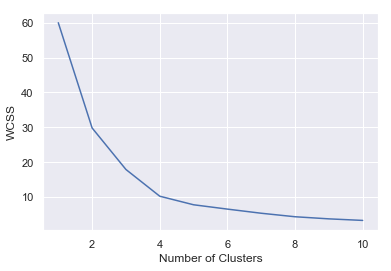

In [19]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## Explore Clustering Solutions and Select the Number of Clusters

In [35]:
# Fiddle with k (the number of clusters) based on the elbow 
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [36]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,3
1,6,-0.28,0
2,5,-0.99,3
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,3
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

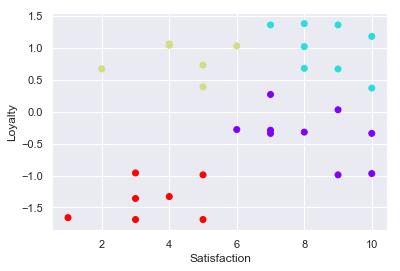

In [37]:
# Plot 
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Analysis: In unsupervised learning, the algorithm will do the magic but WE need to interpret the results
- Let's label the clusters: Bottom-left: Alienated
- top-left: Supporters 
- bottom-right: Roamers(They like the brand but are not loyal to it)
- top-right: Fans(core customers) 
- Final: The 4 and 5 clusters are the best for interpreting this data.